# <font color=blue>Contents</font>

1. <font color=blue>Introduction
2. Importing the packages
3. Loading the data
4. Merging the data
5. Data Wrangling
    - <font color=green>Changing the column names
    - Imputing the null with the mean
    - Renaming the Index column</font>
6. <font color=blue>EDA</font>
    - <font color = green>Top 10 Emissions by State in each Year
    - Visualizing top 10 Emissions by State
    - Comparing emissions by Top 10 states in 2011 between 2011 and 2020</font>
7. <font color=blue> Subsetting the datasets with the numeric columns and the State
8. One-hot encoding for States
9. Model 1. MultiOutput Regressor</font>
    - <font color=green>9.1 MultiOutput Regressor model for all 4 datasets - Random Forest
    - 9.2 Model 2: MultiOutput Regressor model for all 4 datasets - Ridge</font>
10. <font color=blue>Model 2: OLS Linear Regression </font>
    - <font color=green>10.1 Standardizing the numeric columns
    - 10.2 Adding a constant and Train Test split of the datasets 
    - 10.3 OLS Model on 4 datasets    
11. <font color=blue>Model 3: Random Forest Regressor
12. Comparison of performance metric R<sup>2</sup> of different models
13. Random Forest Model on all the 4 datasets
14. Output - Future prediction
15. Conclusion
    </blue>


# 1. Introduction

EDA aims phasing down production and consumption by 85 percent over the next 15 years, maximizing reclamation and minimizing releases from equipment, and facilitating the transition to next-generation technologies through sector-based restrictions. A global HFC phasedown is expected to avoid up to 0.5° Celsius of global warming by 2100.
 
With the emission reports submitted by GHGRP(Greenhouse Gases Reporting Program) to EDA(Environmental Protection Agency of United States) over the past decade, 2011-2020, we are trying to see the pattern of how the emission has been taken care of by various industries in the different states of US. There has been some data missing in the earlier industries, as more industries started to report the emissions data in the recent years. So, this missing data has been handled by imputing the mean value of the emissions, thereby minimizing the effect of these imputed values on the original data. 

We are trying to see how the industries have been doing with the emissions and also eventually figure out and predict how the emissions will be after this decade, by 2030.

Data Citation: 

U.S. Environmental Protection Agency Office of Atmospheric Programs
Greenhouse Gas Reporting Program (GHGRP)
[Compressed file contains a multi-year data summary spreadsheet containing the most important, high-level information for facilities, as well as yearly spreadsheets containing slightly more detailed information than the multi-year summary, including reported emissions by greenhouse gas and process.]
Available at https://www.epa.gov/ghgreporting/data-sets
Date accessed: [September, 2021]


# 2. Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import math

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge

import time

# 3. Loading Data 

This data set had emission information from different sources and industries across the country for the years 2011 - 2020. I took the Direct Emitters, Onshore Oil and Gas production, Local Distribution Companies, and SF6 from electrical equipments from the data. 
The data for the years 2011-2020 are then merged for each of these in a separate dataframe.

In [2]:
#read the direct emitters data for the years 2011-2020
data1_de = pd.read_excel('../raw_data/ghgp_data_2011.xlsx',skiprows=3,index_col=0,usecols="A:N",)
data2_de = pd.read_excel('../raw_data/ghgp_data_2012.xlsx',skiprows=3,index_col=0,usecols="A:N")
data3_de = pd.read_excel('../raw_data/ghgp_data_2013.xlsx',skiprows=3,index_col=0,usecols="A:N")
data4_de = pd.read_excel('../raw_data/ghgp_data_2014.xlsx',skiprows=3,index_col=0,usecols="A:N")
data5_de = pd.read_excel('../raw_data/ghgp_data_2015.xlsx',skiprows=3,index_col=0,usecols="A:N")
data6_de = pd.read_excel('../raw_data/ghgp_data_2016.xlsx',skiprows=3,index_col=0,usecols="A:N")
data7_de = pd.read_excel('../raw_data/ghgp_data_2017.xlsx',skiprows=3,index_col=0,usecols="A:N")
data8_de = pd.read_excel('../raw_data/ghgp_data_2018.xlsx',skiprows=3,index_col=0,usecols="A:N")
data9_de = pd.read_excel('../raw_data/ghgp_data_2019.xlsx',skiprows=3,index_col=0,usecols="A:N")
data10_de = pd.read_excel('../raw_data/ghgp_data_2020.xlsx',skiprows=3,index_col=0,usecols="A:N")

#reading the emission data from onshore oil and gas production for the years 2011 to 2020

data1_oog = pd.read_excel('../raw_data/ghgp_data_2011.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data2_oog = pd.read_excel('../raw_data/ghgp_data_2012.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data3_oog = pd.read_excel('../raw_data/ghgp_data_2013.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data4_oog = pd.read_excel('../raw_data/ghgp_data_2014.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data5_oog = pd.read_excel('../raw_data/ghgp_data_2015.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data6_oog = pd.read_excel('../raw_data/ghgp_data_2016.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data7_oog = pd.read_excel('../raw_data/ghgp_data_2017.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data8_oog = pd.read_excel('../raw_data/ghgp_data_2018.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data9_oog = pd.read_excel('../raw_data/ghgp_data_2019.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)
data10_oog = pd.read_excel('../raw_data/ghgp_data_2020.xlsx',skiprows=3,index_col=0,usecols="A:Q",sheet_name= 1)

#reading the emission data from LDC- direct emissions for the years 2011 to 2020

data1_ldc = pd.read_excel('../raw_data/ghgp_data_2011.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 2)
data2_ldc = pd.read_excel('../raw_data/ghgp_data_2012.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 2)
data3_ldc = pd.read_excel('../raw_data/ghgp_data_2013.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 2)
data4_ldc = pd.read_excel('../raw_data/ghgp_data_2014.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 2)
data5_ldc = pd.read_excel('../raw_data/ghgp_data_2015.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 2)
data6_ldc = pd.read_excel('../raw_data/ghgp_data_2016.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 4)
data7_ldc = pd.read_excel('../raw_data/ghgp_data_2017.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 4)
data8_ldc = pd.read_excel('../raw_data/ghgp_data_2018.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 4)
data9_ldc = pd.read_excel('../raw_data/ghgp_data_2019.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 4)
data10_ldc = pd.read_excel('../raw_data/ghgp_data_2020.xlsx',skiprows=3,index_col=0,usecols="A:N",sheet_name= 4)

#reading the emission data from SF6 from electric emissions for the years 2011 to 2020

data1_sf6 = pd.read_excel('../raw_data/ghgp_data_2011.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 3)
data2_sf6 = pd.read_excel('../raw_data/ghgp_data_2012.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 3)
data3_sf6 = pd.read_excel('../raw_data/ghgp_data_2013.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 3)
data4_sf6 = pd.read_excel('../raw_data/ghgp_data_2014.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 3)
data5_sf6 = pd.read_excel('../raw_data/ghgp_data_2015.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 3)
data6_sf6 = pd.read_excel('../raw_data/ghgp_data_2016.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 5)
data7_sf6 = pd.read_excel('../raw_data/ghgp_data_2017.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 5)
data8_sf6 = pd.read_excel('../raw_data/ghgp_data_2018.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 5)
data9_sf6 = pd.read_excel('../raw_data/ghgp_data_2019.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 5)
data10_sf6 = pd.read_excel('../raw_data/ghgp_data_2020.xlsx',skiprows=3,index_col=0,usecols="A:L,N",sheet_name= 5)


In [3]:
data1_sf6.columns

Index(['FRS Id', 'Facility Name', 'Reported City', 'Reported State',
       'Reported Zip Code', 'Reported Address', 'Reported County',
       'Reported Latitude', 'Reported Longitude', 'Primary NAICS Code',
       'Industry Type (subparts)', 'SF6 emissions '],
      dtype='object')

# 4. Merging the data

In [4]:
df_sf6 = data10_sf6.merge(data9_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes = ('','_2019'))
df_sf6 = df_sf6.merge(data8_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2018'))
df_sf6 = df_sf6.merge(data7_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2017'))
df_sf6 = df_sf6.merge(data6_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2016'))
df_sf6 = df_sf6.merge(data5_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2015'))
df_sf6 = df_sf6.merge(data4_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2014'))
df_sf6 = df_sf6.merge(data3_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2013'))
df_sf6 = df_sf6.merge(data2_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2012'))
df_sf6 = df_sf6.merge(data1_sf6[['SF6 emissions ']], on = 'Facility Id', how='left',suffixes=('','_2011'))

In [5]:
df_sf6.head()

,FRS Id,Facility Name,Reported City,Reported State,Reported Zip Code,Reported Address,Reported County,Reported Latitude,Reported Longitude,Primary NAICS Code,...,SF6 emissions,SF6 emissions _2019,SF6 emissions _2018,SF6 emissions _2017,SF6 emissions _2016,SF6 emissions _2015,SF6 emissions _2014,SF6 emissions _2013,SF6 emissions _2012,SF6 emissions _2011
Facility Id,,,,,,,,,,,,,,,,,,,,,
1003708,1.100006e+11,AEP Corporate SF6 Emissions,Columbus,OH,43215,1 Riverside Plaza,WASHINGTON COUNTY,39.588493,-81.682523,221112,...,132693.72,172689.48,169844.04,197281.56,464030.16,148364.16,124825.44,134433.36,88826.52,123781.20
1010811,1.100107e+11,Ameren Illinois Electric,Peoria,IL,61602,300 Liberty Street,PEORIA COUNTY,40.690480,-89.592440,221122,...,7644.84,8846.40,30171.24,9888.36,23251.44,10488.00,20241.84,28244.64,91298.04,11251.80
1010812,1.100118e+11,Ameren Missouri Electric,St. Louis,MO,63103,1901 Chouteau Avenue,ST. LOUIS CITY,38.620785,-90.211635,221122,...,5264.52,10745.64,14706.00,20301.12,5180.16,5492.52,35928.24,13025.64,14322.96,31703.40
1010076,1.100555e+11,Anaheim Electric Distribution System,Anaheim,CA,92805,"201 S. Anaheim Blvd., MS-1101",ORANGE COUNTY,33.834580,-117.914010,221122,...,1810.32,2845.44,2152.32,1422.72,6037.44,2975.40,1876.44,7685.88,7986.84,6513.96
1009780,1.100118e+11,Arizona Public Service Company,Phoenix,AZ,85021,2124 W. Cheryl Ave.,MARICOPA COUNTY,33.578425,-112.104408,221121,...,40777.80,9238.56,9482.52,14897.52,26454.84,54697.20,38876.28,14033.40,4190.64,36288.48


In [6]:
df_sf6.columns

Index(['FRS Id', 'Facility Name', 'Reported City', 'Reported State',
       'Reported Zip Code', 'Reported Address', 'Reported County',
       'Reported Latitude', 'Reported Longitude', 'Primary NAICS Code',
       'Industry Type (subparts)', 'SF6 emissions ', 'SF6 emissions _2019',
       'SF6 emissions _2018', 'SF6 emissions _2017', 'SF6 emissions _2016',
       'SF6 emissions _2015', 'SF6 emissions _2014', 'SF6 emissions _2013',
       'SF6 emissions _2012', 'SF6 emissions _2011'],
      dtype='object')

In [7]:
df_ldc = data10_ldc.merge(data9_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes = ('','_2019'))
df_ldc = df_ldc.merge(data8_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2018'))
df_ldc = df_ldc.merge(data7_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2017'))
df_ldc = df_ldc.merge(data6_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2016'))
df_ldc = df_ldc.merge(data5_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2015'))
df_ldc = df_ldc.merge(data4_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2014'))
df_ldc = df_ldc.merge(data3_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2013'))
df_ldc = df_ldc.merge(data2_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2012'))
df_ldc = df_ldc.merge(data1_ldc['Total reported direct emissions from Local Distribution Companies'], on = 'Facility Id', how='left',suffixes=('','_2011'))


df_ldc.columns

Index(['FRS Id', 'Facility Name', 'State where Emissions Occur',
       'Reported City', 'Reported State', 'Reported Zip Code',
       'Reported Address', 'Reported County', 'Reported Latitude',
       'Reported Longitude', 'Primary NAICS Code', 'Industry Type (subparts)',
       'Total reported direct emissions from Local Distribution Companies',
       'Total reported direct emissions from Local Distribution Companies_2019',
       'Total reported direct emissions from Local Distribution Companies_2018',
       'Total reported direct emissions from Local Distribution Companies_2017',
       'Total reported direct emissions from Local Distribution Companies_2016',
       'Total reported direct emissions from Local Distribution Companies_2015',
       'Total reported direct emissions from Local Distribution Companies_2014',
       'Total reported direct emissions from Local Distribution Companies_2013',
       'Total reported direct emissions from Local Distribution Companies_2012',
  

In [8]:
df_oog = data10_oog.merge(data9_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes = ('','_2019'))
df_oog = df_oog.merge(data8_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes = ('','_2018'))
df_oog = df_oog.merge(data7_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2017'))
df_oog = df_oog.merge(data6_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2016'))
df_oog = df_oog.merge(data5_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2015'))
df_oog = df_oog.merge(data4_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2014'))
df_oog = df_oog.merge(data3_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2013'))
df_oog = df_oog.merge(data2_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2012'))
df_oog = df_oog.merge(data1_oog[['Total reported emissions from Onshore Oil & Gas Production ',
       'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ',
       'Nitrous Oxide (N2O) emissions ']], on = 'Facility Id', how='left',suffixes=('','_2011'))



In [9]:
df_de = data1_de.merge(data2_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2012'))
df_de = df_de.merge(data3_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2013'))
df_de = df_de.merge(data4_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2014'))
df_de = df_de.merge(data5_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2015'))
df_de = df_de.merge(data6_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2016'))
df_de = df_de.merge(data7_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2017'))
df_de = df_de.merge(data8_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2018'))
df_de = df_de.merge(data9_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2019'))
df_de = df_de.merge(data10_de['Total reported direct emissions'], on='Facility Id', how='left', suffixes=('','_2020'))


# 5. Data Wrangling

## 5.1 Setting the column names

In [10]:
df_sf6.columns = ['FRS_id', 'Facility_Name', 'City', 'State',
       'Zip_Code', 'Address', 'County',
       'Latitude', 'Longitude', 'Primary_NAICS_Code',
       'IT_subparts',
       '2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']
df_ldc.columns = ['FRS_Id', 'Facility_Name', 'State_where_Emissions_Occur',
       'City', 'State', 'Zip_Code',
       'Address', 'County', 'Latitude',
       'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       '2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']
df_oog.columns = ['FRS_Id', 'Facility_Name', 'Basin', 'City', 'State',
       'Zip_Code', 'Address', 'County',
       'Latitude', 'Longitude', 'Primary_NAICS_Code',
       'IT_subparts',
       '2020',
       'CO2_emi_non_bio_2020', 'Meth_CH4_emi_2020',
       'N2O_emi_2020',
       '2019',
       'CO2_emi_non_bio_2019', 'Meth_CH4_emi_2019',
       'N2O_emi_2019',
       '2018',
       'CO2_emi_non_bio_2018', 'Meth_CH4_emi_2018',
       'N2O_emi_2018',
       '2017',
       'CO2_emi_non_bio_2017', 'Meth_CH4_emi_2017',
       'N2O_emi_2017',
       '2016',
       'CO2_emi_non_bio_2016', 'Meth_CH4_emi_2016',
       'N2O_emi_2016',
       '2015',
       'CO2_emi_non_bio_2015', 'Meth_CH4_emi_2015',
       'N2O_emi_2015',
       '2014',
       'CCO2_emi_non_bio_2014', 'Meth_CH4_emi_2014',
       'N2O_emi_2014',
       '2013',
       'CO2_emi_non_bio_2013', 'Meth_CH4_emi_2013',
       'N2O_emi_2013',
       '2012',
       'CO2_emi_non_bio_2012', 'Meth_CH4_emi_2012',
       'N2O_emi_2012',
       '2011',
       'CO2_emi_non_bio_2011', 'Meth_CH4_emi_2011',
       'N2O_emi_2011']
df_de.columns = ['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code',
       'IT_subparts', 'IT_sectors',
       '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

In [11]:
#Count of missing values in df_de by columns

missing = pd.concat([df_de.isnull().sum(), 100 * df_de.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by='count',ascending = False)

,count,%
2020,1522,22.035616
2019,1429,20.689156
2018,1316,19.053135
2017,1263,18.285797
2016,1070,15.491530
Address,565,8.180107
2015,539,7.803677
2014,271,3.923556
2013,174,2.519183
County,100,1.447807


In [12]:
df_de.shape

(6907, 22)

In [13]:
#categorical features
df_de.select_dtypes('object')

,Facility_Name,City,State,Address,County,IT_subparts,IT_sectors
Facility Id,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,HH,Waste
1010040,15-18565/15-18662,Hazard,KY,4200 S. Hwy 15,PERRY COUNTY,FF,Other
1010085,15-19015,Hazard,KY,1845 S. KY HWY 15,PERRY,FF,Other
1000112,23rd and 3rd,BROOKLYN,NY,730 3rd Avenue,Kings,"C,D",Power Plants
1006394,29-6 #2 Central Delivery Point,Blanco,NM,NaN,Rio Arriba,C,Petroleum and Natural Gas Systems
...,...,...,...,...,...,...,...
1003318,ZYBACH CRYOGENIC PLANT,Briscoe,TX,16475 FM 1046,WHEELER,"C,W-PROC",Petroleum and Natural Gas Systems
1001308,Zeeland Generating Station,ZEELAND,MI,425 FAIRVIEW AVE,Ottawa,"C,D",Power Plants
1000805,Zion Energy Center,ZION,IL,5701 NINTH ST,Lake,"C,D",Power Plants


In [14]:
(df_de['Facility_Name']+', '+df_de['City']+', '+df_de['State']+', '+df_de['Address']).value_counts().sort_values(ascending=False).head()

ISOLATEK INTERNATIONAL, HUNTINGTON, IN, 701 N BROADWAY                          1
Electric Glass Fiber America, LLC, LEXINGTON, NC, 473 NEW JERSEY CHURCH ROAD    1
Monroe Energy, LLC, Trainer Refinery, Trainer, PA, 4101 Post Road               1
GERDAU AMERISTEEL, JACKSON, TN, 801 Gerdau Dr.                                  1
Cedar Bayou, BAYTOWN, TX, 7705 WEST BAY ROAD                                    1
dtype: int64

In [15]:
df_de['State'].value_counts()

TX    740
CA    484
LA    376
PA    291
IL    274
OH    260
MI    222
NY    216
IN    196
FL    183
AL    168
GA    163
OK    162
KY    157
VA    152
CO    150
IA    149
AR    147
WI    146
NC    140
MN    140
KS    121
WY    118
MO    114
TN    114
WV    111
NJ    110
MS    103
SC     99
AZ     89
MA     88
NM     86
WA     82
UT     76
NE     72
MD     68
AK     67
OR     62
CT     49
ID     46
ND     44
NV     40
MT     39
PR     31
SD     31
ME     29
HI     27
DE     22
NH     18
RI     12
VT      9
DC      7
VI      4
GU      3
Name: State, dtype: int64

## 5.2 Imputing the null with the mean values

In [16]:
#imputing the null values with the mean of the column

imputed_df_de = df_de.iloc[:,12:]
df_de_backup = df_de
for col in imputed_df_de.columns:
    imputed_column = df_de[col].fillna(df_de[col].mean())
    #Fill in Series on DataFrame
    df_de[col] = imputed_column



print(df_de.describe())

             FRS_Id      Zip Code     Latitude    Longitude  \
count  6.877000e+03   6907.000000  6907.000000  6907.000000   
mean   1.100210e+11  54193.487332    37.581917   -92.826446   
std    2.112058e+07  27341.919264     5.845818    15.692881   
min    1.100003e+11      0.000000    13.394900  -166.551311   
25%    1.100012e+11  32112.500000    33.478544   -98.049331   
50%    1.100133e+11  55379.000000    38.040279   -90.145030   
75%    1.100411e+11  77503.000000    41.335181   -82.482255   
max    1.100702e+11  99801.000000    71.292071   144.807727   

       Primary_NAICS_Code          2011          2012          2013  \
count         6907.000000  6.907000e+03  6.907000e+03  6.907000e+03   
mean        354810.279427  4.643960e+05  4.431608e+05  4.511391e+05   
std         145878.312298  1.527645e+06  1.412125e+06  1.448718e+06   
min         111419.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%         221112.000000  3.336539e+04  3.282539e+04  3.207703e+04   
50%   

In [17]:
#Count of missing values in df_oog by columns

missing = pd.concat([df_oog.isnull().sum(), 100 * df_oog.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by='count',ascending = False)

,count,%
N2O_emi_2011,265,56.623932
Meth_CH4_emi_2011,254,54.273504
CO2_emi_non_bio_2011,254,54.273504
2011,254,54.273504
N2O_emi_2012,245,52.350427
Meth_CH4_emi_2012,231,49.358974
CO2_emi_non_bio_2012,231,49.358974
2012,231,49.358974
N2O_emi_2013,223,47.649573
CO2_emi_non_bio_2013,206,44.017094


In [18]:
#imputing the null values with the mean of the column

imputed_df_oog = df_oog.iloc[:,12:]
df_oog_backup = df_oog
for col in imputed_df_oog.columns:
    imputed_column = df_oog[col].fillna(df_oog[col].mean())
    #Fill in Series on DataFrame
    df_oog[col] = imputed_column


print(df_oog.describe())

             FRS_Id      Zip_Code    Latitude   Longitude  Primary_NAICS_Code  \
count  3.280000e+02    468.000000  468.000000  468.000000          468.000000   
mean   1.100460e+11  73962.777778   35.348369  -99.269582       211140.995726   
std    2.015593e+07  15391.044060    6.388005   10.452588          183.217648   
min    1.100008e+11  15086.000000   26.198570 -151.753262       211120.000000   
25%    1.100342e+11  74143.750000   30.131825 -103.679574       211120.000000   
50%    1.100555e+11  77002.000000   33.223362  -96.856543       211120.000000   
75%    1.100637e+11  79702.250000   39.721355  -95.391017       211130.000000   
max    1.100707e+11  99734.000000   70.510000  -77.001065       213112.000000   

               2020  CO2_emi_non_bio_2020  Meth_CH4_emi_2020  N2O_emi_2020  \
count  4.680000e+02          4.680000e+02       4.680000e+02    468.000000   
mean   1.997609e+05          1.187905e+05       8.153659e+04    122.197698   
std    3.165285e+05          2.13590

In [19]:
#Count of missing values in df_ldc by columns

missing = pd.concat([df_ldc.isnull().sum(), 100 * df_ldc.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by='count',ascending = False)

,count,%
2011,17,10.365854
2012,16,9.756098
2013,15,9.146341
2014,10,6.097561
2015,8,4.878049
2016,8,4.878049
2017,8,4.878049
2018,6,3.658537
County,5,3.048780
2019,4,2.439024


In [20]:
#imputing the null values with the mean of the column

imputed_df_ldc = df_ldc.iloc[:,12:]
df_ldc_backup = df_ldc
for col in imputed_df_ldc.columns:
    imputed_column = df_ldc[col].fillna(df_ldc[col].mean())
    #Fill in Series on DataFrame
    df_ldc[col] = imputed_column


print(df_ldc.describe())

             FRS_Id      Zip_Code    Latitude   Longitude  Primary_NAICS_Code  \
count  1.610000e+02    164.000000  164.000000  164.000000          164.000000   
mean   1.100354e+11  47035.609756   38.109034  -89.232060       228707.298780   
std    1.843147e+07  26814.315500    4.557469   12.931696        61728.958465   
min    1.100008e+11   2090.000000   27.950290 -122.672450       221121.000000   
25%    1.100223e+11  24855.500000   35.139162  -95.370401       221210.000000   
50%    1.100438e+11  46708.000000   38.798414  -87.599282       221210.000000   
75%    1.100438e+11  70290.500000   41.587580  -79.593100       221210.000000   
max    1.100701e+11  99336.000000   47.660000  -70.910590       921120.000000   

               2020          2019          2018          2017          2016  \
count  1.640000e+02  1.640000e+02  1.640000e+02  1.640000e+02  1.640000e+02   
mean   7.707990e+04  8.006306e+04  8.352378e+04  8.660141e+04  8.857234e+04   
std    1.445682e+05  1.476136e+05

In [21]:
#Count of missing values in df_sf6 by columns

missing = pd.concat([df_sf6.isnull().sum(), 100 * df_sf6.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by='count',ascending = False)

,count,%
2011,28,31.460674
2012,28,31.460674
2015,27,30.337079
2013,26,29.213483
2014,26,29.213483
2016,25,28.089888
2017,22,24.719101
2018,20,22.471910
2019,19,21.348315
2020,11,12.359551


In [22]:
# imputing the null values with the mean of the column

imputed_df_sf6 = df_sf6.iloc[:,11:]
df_sf6_backup = df_sf6
for col in imputed_df_sf6.columns:
    imputed_column = df_sf6[col].fillna(df_sf6[col].mean())
    #Fill in Series on DataFrame
    df_sf6[col] = imputed_column


print(df_sf6.describe())

             FRS_id      Zip_Code   Latitude   Longitude  Primary_NAICS_Code  \
count  8.800000e+01     89.000000  89.000000   89.000000           89.000000   
mean   1.100326e+11  58854.988764  37.351718  -95.985143       224793.415730   
std    2.484037e+07  29094.051174   5.962872   16.989547        18856.556957   
min    1.100004e+11    936.000000  18.466224 -157.851490       221111.000000   
25%    1.100096e+11  36421.000000  33.447479 -106.632900       221121.000000   
50%    1.100342e+11  61602.000000  38.021520  -94.405951       221121.000000   
75%    1.100555e+11  84116.000000  41.463390  -83.442980       221122.000000   
max    1.100708e+11  99220.000000  47.675155  -66.105724       325110.000000   

                2020           2019           2018           2017  \
count      89.000000      89.000000      89.000000      89.000000   
mean    25703.024615   35769.845143   32408.184348   37762.448955   
std     40199.550972   56689.732309   45463.960772   52790.747900   
min

## 5.3 Renaming the Index column

In [23]:
df_de.index.rename('Fac_Id',inplace=True)
df_sf6.index.rename('Fac_Id',inplace=True)
df_ldc.index.rename('Fac_Id',inplace=True)
df_oog.index.rename('Fac_Id',inplace=True)

# 6. EDA

In [24]:
df_de_gr = df_de.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_de_state = pd.melt(df_de_gr,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)")

de_20 = df_de_state[df_de_state['Year']== '2020']
de_11 = df_de_state[df_de_state['Year']== '2011']

df_sf6_gr = df_sf6.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_sf6_state = pd.melt(df_sf6_gr,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)")

sf6_20 = df_sf6_state[df_sf6_state['Year']== '2020']
sf6_11 = df_sf6_state[df_sf6_state['Year']== '2011']

df_ldc_gr = df_ldc.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_ldc_state = pd.melt(df_ldc_gr,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)")

ldc_20 = df_ldc_state[df_ldc_state['Year']== '2020']
ldc_11 = df_ldc_state[df_ldc_state['Year']== '2011']

df_oog_gr = df_oog.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_oog_state = pd.melt(df_oog_gr,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)")

oog_20 = df_oog_state[df_oog_state['Year']== '2020']
oog_11 = df_oog_state[df_oog_state['Year']== '2011']




In [25]:
de_11

,Year,Avg Emissions(metric tons)
State,,
AK,2011,280444.82
AL,2011,661730.26
AR,2011,314626.80
AZ,2011,671738.22
CA,2011,213467.89
CO,2011,362114.50
CT,2011,180264.33
DC,2011,65255.53
DE,2011,308001.15


## 6.1 Top 10 emissions by State in each Year

In [26]:
top10 = de_11.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
top10_2 = de_20.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()

In [27]:
#Top 10 states on DE in the year 2011
top10

,Year,State,Avg Emissions(metric tons)
0,2011,VI,1373102.81
1,2011,ND,844030.38
2,2011,IN,841352.87
3,2011,MO,834667.83
4,2011,WV,820435.24
5,2011,KY,775796.10
6,2011,FL,769072.93
7,2011,AZ,671738.22
8,2011,AL,661730.26
9,2011,PR,626840.88


In [28]:
#Top 10 states on DE in the year 2020

top10_2

,Year,State,Avg Emissions(metric tons)
0,2020,ND,820802.66
1,2020,FL,701441.68
2,2020,WV,694078.72
3,2020,MO,670748.27
4,2020,WY,647975.93
5,2020,IN,609700.12
6,2020,PR,595794.72
7,2020,TX,538257.61
8,2020,AZ,530331.26
9,2020,UT,526601.26


### 6.1.1 Bottom 10 emissions by State in each Year

In [29]:
#Least emitting states in the year 2011 and 2020
bottom10 = de_11.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()
bottom10_2 = de_20.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()
print(bottom10)

   Year State  Avg Emissions(metric tons)
0  2011    DC                    65255.53
1  2011    VT                    73658.52
2  2011    ID                    74725.30
3  2011    OR                   171295.69
4  2011    SD                   179130.58
5  2011    CT                   180264.33
6  2011    ME                   202563.32
7  2011    MA                   204947.79
8  2011    CA                   213467.89
9  2011    NY                   217715.00


In [30]:
bot10_st_11 = bottom10['State']
top10_st_11 = top10['State']
bot10_st_20 = bottom10_2['State']
top10_st_20 = top10_2['State']


## 6.3 Visualizing top 10 emissions

Text(0.5, 1.0, 'DE - Top 10 emitting states of 2011')

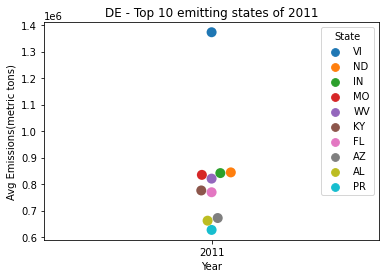

In [31]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= top10)
plt.title('DE - Top 10 emitting states of 2011')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### 9 out of 10 top emitting states have their average emission is less than 90K in the year 2011.
        
</div>

Text(0.5, 1.0, 'DE - Top 10 emitting states of 2020')

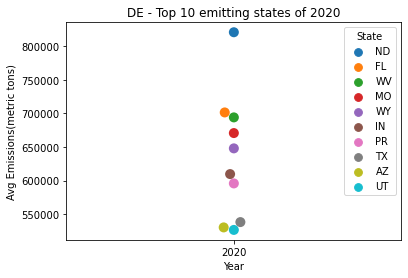

In [32]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= top10_2)
plt.title('DE - Top 10 emitting states of 2020')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 

### 8 out of 10 top emitting states have their average emissions < 700K  in the year 2020.
                                                                       
</div>

## 6.4 Comparing emissions by Top 10 States of 2011 between 2011 and 2020

In [33]:
compare_de = df_de_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[top10_st_11]
compare_de = pd.melt(compare_de,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()


Text(0.5, 1.0, 'DE - Comparison between 2011 to 2020 by 2011 top 10 states')

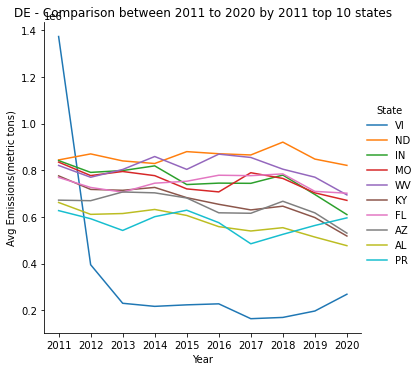

In [34]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = True, kind='line', data=compare_de )
plt.title('DE - Comparison between 2011 to 2020 by 2011 top 10 states')


<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 

### The fluctuating trend is neither spiking up nor down.. 
</div>

In [35]:
compare_de_b = df_de_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[bot10_st_11]
compare_de_b = pd.melt(compare_de_b,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

<AxesSubplot:xlabel='Year', ylabel='Avg Emissions(metric tons)'>

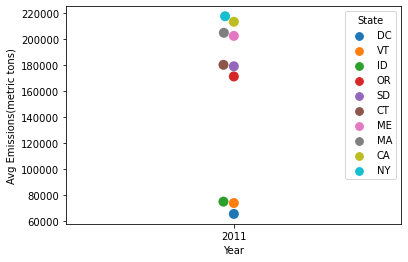

In [36]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= bottom10)


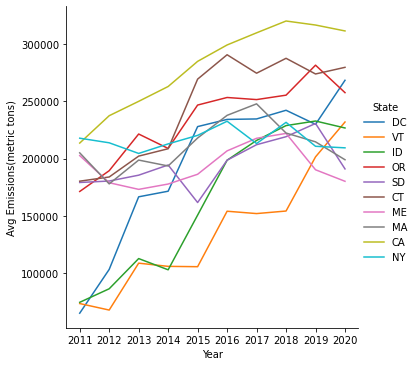

In [37]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_de_b )


<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 

### Not the same for least 10 emittings states.. They have emitted more in the following decade.. 
</div>

In [38]:
change_de = round((de_20['Avg Emissions(metric tons)'] - de_11['Avg Emissions(metric tons)'])/de_11['Avg Emissions(metric tons)'],2)*100
print('\nStates that have reduced direct emissions since 2011\n', change_de[change_de<0].sort_values())
print('\n\nStates that have increased direct emissions since 2011\n', change_de[change_de>0].sort_values())


States that have reduced direct emissions since 2011
 State
VI   -80.0
NH   -47.0
MD   -41.0
KY   -33.0
GA   -31.0
PA   -31.0
TN   -29.0
IL   -29.0
AL   -28.0
IN   -28.0
IA   -27.0
HI   -25.0
OH   -23.0
SC   -22.0
NC   -21.0
AZ   -21.0
MO   -20.0
OK   -18.0
MI   -16.0
WV   -15.0
NE   -13.0
ME   -11.0
KS   -11.0
NM   -11.0
MT    -9.0
MN    -9.0
FL    -9.0
WI    -8.0
UT    -7.0
PR    -5.0
AK    -5.0
NY    -4.0
ND    -3.0
MA    -3.0
TX    -2.0
Name: Avg Emissions(metric tons), dtype: float64


States that have increased direct emissions since 2011
 State
LA      1.0
VA      4.0
NV      4.0
SD      7.0
GU     10.0
RI     11.0
DE     13.0
CO     14.0
NJ     14.0
WY     18.0
AR     21.0
MS     23.0
WA     24.0
CA     46.0
OR     50.0
CT     55.0
ID    203.0
VT    215.0
DC    311.0
Name: Avg Emissions(metric tons), dtype: float64


## Top 10 SF6 Emissions by State in each Year

In [39]:
sf6_top10 = sf6_11.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
sf6_top10_2 = sf6_20.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
sf6_bottom10 = sf6_11.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()
sf6_bottom10_2 = sf6_20.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()


bot10_sf6_11 = sf6_bottom10['State'].unique()
top10_sf6_11 = sf6_top10['State'].unique()
bot10_sf6_20 = sf6_bottom10_2['State'].unique()
top10_sf6_20 = sf6_top10_2['State'].unique()

print("States with Least SF6 Emissions in 2011, 2012: ", bot10_sf6_11)
print("States with Least SF6 Emissions in 2019, 2020: ", bot10_sf6_20)
print("States with Most SF6 Emissions in 2011, 2012: ", top10_sf6_11)
print("States with Most SF6 Emissions in 2019, 2020: ", top10_sf6_20)

States with Least SF6 Emissions in 2011, 2012:  ['OR' 'HI' 'VT' 'NV' 'SC' 'IL' 'WA' 'NM' 'CO' 'NE']
States with Least SF6 Emissions in 2019, 2020:  ['AL' 'VT' 'IN' 'MO' 'ND' 'HI' 'IA' 'OR' 'NV' 'IL']
States with Most SF6 Emissions in 2011, 2012:  ['NC' 'TN' 'OH' 'UT' 'VA' 'GA' 'KS' 'NY' 'PA' 'IN']
States with Most SF6 Emissions in 2019, 2020:  ['NC' 'OH' 'CO' 'GA' 'MN' 'FL' 'TN' 'OK' 'CA' 'VA']


## Visualizing top 10 SF6 Emissions by State

Text(0.5, 1.0, 'SF6 - Top 10 emitting states of 2011')

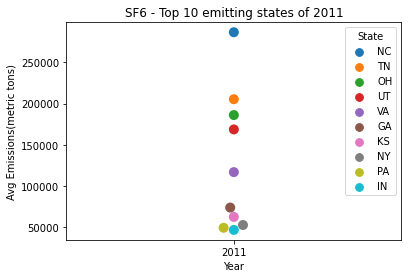

In [40]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= sf6_top10)
plt.title('SF6 - Top 10 emitting states of 2011')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 

### 8 out of 10 top 10 SF6 emitting states' average was lesser than 200K.
</div>

Text(0.5, 1.0, 'SF6 - Top 10 emitting states of 2020')

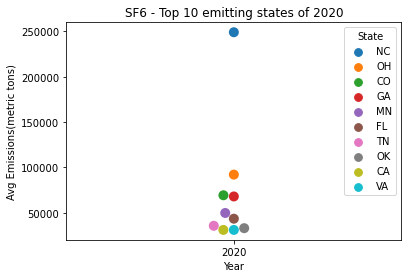

In [41]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= sf6_top10_2)
plt.title('SF6 - Top 10 emitting states of 2020')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### 9 out of 10 top 10 states have brought their SF6 emission under 100K in the year 2020. 
    
</div>

## Top 10 SF6 Emissions by State in each Year

In [42]:
compare_sf6 = df_sf6_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[top10_sf6_11]
compare_sf6 = pd.melt(compare_sf6,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()
compare_sf6_b = df_sf6_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[bot10_sf6_11]
compare_sf6_b = pd.melt(compare_sf6_b,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

Text(0.5, 1.0, 'SF6 - 10 Least emitting states of 2011')

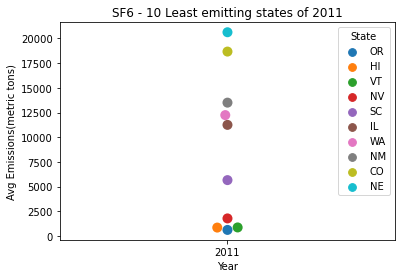

In [43]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= sf6_bottom10)
plt.title('SF6 - 10 Least emitting states of 2011')

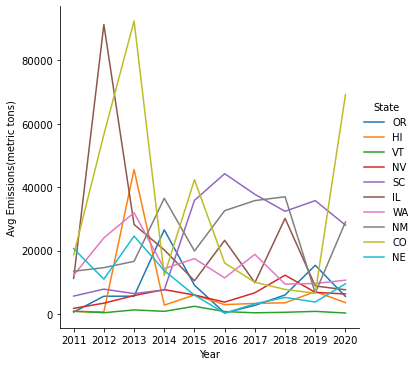

In [44]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_sf6_b )


<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### Most states either show upward trend, increasing the emissions or just a flat line showing a very less reduction in emissions.
    
</div>

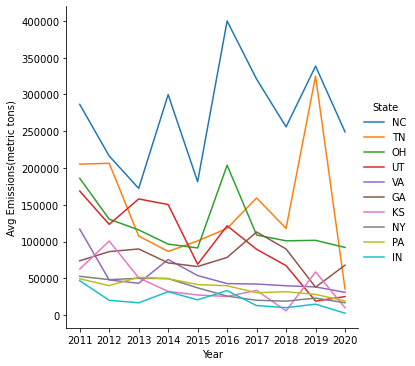

In [45]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = False, dashes = False, kind='line', data=compare_sf6 )


<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### This looks good, the top emitting states bringing down the SF6 emissions, (SF6 emissions are hundreds and thousands of times serious than the GHG emissions). 
    
### The list below shows the states that have increased emissions are huge in percentage.. Something that needs to be paid immediate attention to.
    
</div>

In [46]:
change_sf6 = round((sf6_20['Avg Emissions(metric tons)'] - sf6_11['Avg Emissions(metric tons)'])/sf6_11['Avg Emissions(metric tons)'],2)*100
print('\nStates that have reduced SF6 emissions since 2011\n', change_sf6[change_sf6<0].sort_values())
print('\n\nStates that have increased SF6 emissions since 2011\n', change_sf6[change_sf6>0].sort_values())


States that have reduced SF6 emissions since 2011
 State
AL   -100.0
IN    -94.0
ND    -93.0
MO    -92.0
UT    -85.0
KS    -84.0
IA    -83.0
TN    -83.0
LA    -75.0
VA    -73.0
NY    -68.0
MA    -63.0
VT    -63.0
AZ    -62.0
PR    -62.0
PA    -61.0
MI    -60.0
NJ    -60.0
NE    -54.0
OH    -51.0
TX    -40.0
IL    -32.0
CA    -16.0
NC    -13.0
WA    -13.0
GA     -8.0
KY     -2.0
Name: Avg Emissions(metric tons), dtype: float64


States that have increased SF6 emissions since 2011
 State
FL      1.0
OK      4.0
MN    105.0
NM    115.0
NV    254.0
CO    271.0
HI    320.0
SC    395.0
OR    793.0
Name: Avg Emissions(metric tons), dtype: float64


## Top 10 LDC Emissions by State in each Year

In [47]:
ldc_top10 = ldc_11.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
ldc_top10_2 = ldc_20.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
ldc_bottom10 = ldc_11.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()
ldc_bottom10_2 = ldc_20.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()

bot10_ldc_11 = ldc_bottom10['State'].unique()
top10_ldc_11 = ldc_top10['State'].unique()
bot10_ldc_20 = ldc_bottom10_2['State'].unique()
top10_ldc_20 = ldc_top10_2['State'].unique()

print("States with Least LDC Emissions in 2011: ", bot10_ldc_11)
print("States with Least LDC Emissions in 2020: ", bot10_ldc_20)
print("States with Most LDC Emissions in 2011: ", top10_ldc_11)
print("States with Most LDC Emissions in 2020: ", top10_ldc_20)

States with Least LDC Emissions in 2011:  ['VT' 'MS' 'AZ' 'MT' 'DE' 'IA' 'ID' 'OR' 'WA' 'LA']
States with Least LDC Emissions in 2020:  ['MS' 'VT' 'TN' 'KY' 'AZ' 'MT' 'LA' 'DE' 'SC' 'IA']
States with Most LDC Emissions in 2011:  ['CA' 'OH' 'NJ' 'WV' 'GA' 'NY' 'OK' 'RI' 'PA' 'MA']
States with Most LDC Emissions in 2020:  ['CA' 'MI' 'OH' 'NJ' 'GA' 'AR' 'OK' 'PA' 'RI' 'NY']


## Visualizing top 10 LDC Emissions by State

Text(0.5, 1.0, 'LDC - Top 10 emitting states of 2011')

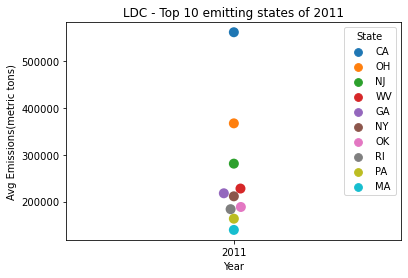

In [48]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= ldc_top10)
plt.title('LDC - Top 10 emitting states of 2011')

Text(0.5, 1.0, 'LDC - Top 10 emitting states of 2020')

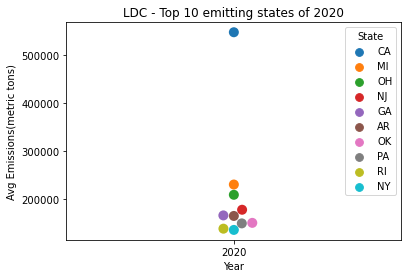

In [49]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= ldc_top10_2)
plt.title('LDC - Top 10 emitting states of 2020')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### Top 10 emitting states of years 2011 and 2020 have a similar emission ranges.
    
</div>

## Comparing LDC emission by Top 10 states in 2011 between 2011 and 2020

In [50]:
compare_ldc = df_ldc_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[top10_ldc_11]
compare_ldc = pd.melt(compare_ldc,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

compare_ldc_b = df_ldc_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[bot10_ldc_11]
compare_ldc_b = pd.melt(compare_ldc_b,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

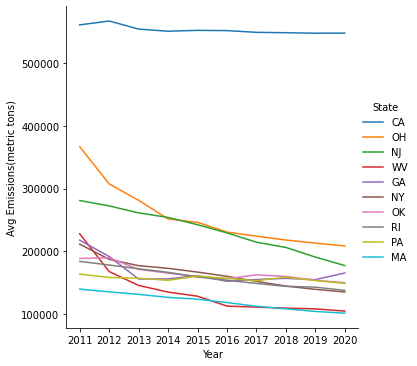

In [51]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_ldc )
#plt.title('LDC - Comparison between 2011 and 2020 by 2011 top 10 states')

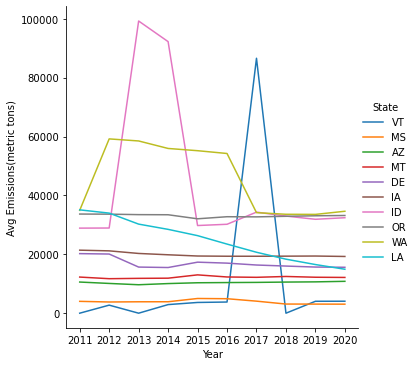

In [52]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_ldc_b )
#plt.title('LDC - Comparison between 2011 and 2020 by 2011 bottom 10 states')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### Similar to the DE and SF6 emissions, top 10 states of 2011 in LDC emissions, have done well to bring the emissions down in 2020.
    
</div>

In [53]:
change_ldc = round((ldc_20['Avg Emissions(metric tons)'] - ldc_11['Avg Emissions(metric tons)'])/ldc_11['Avg Emissions(metric tons)'],2)*100
print('\nStates that have reduced LDC emissions since 2011\n', change_ldc[change_ldc<0].sort_values())
print('\n\nStates that have increased LDC emissions since 2011\n', change_ldc[change_ldc>0].sort_values())


States that have reduced LDC emissions since 2011
 State
TN   -86.0
KY   -82.0
SC   -80.0
NM   -66.0
FL   -60.0
LA   -57.0
WV   -54.0
AL   -51.0
NE   -47.0
UT   -46.0
MD   -46.0
OH   -43.0
MN   -41.0
NJ   -37.0
IN   -36.0
NY   -36.0
KS   -28.0
MA   -28.0
MO   -28.0
WI   -28.0
IL   -25.0
VA   -25.0
RI   -25.0
CT   -25.0
GA   -24.0
MS   -24.0
DE   -23.0
OK   -21.0
CO   -19.0
IA   -10.0
PA    -9.0
CA    -2.0
OR    -1.0
MT    -1.0
WA    -1.0
Name: Avg Emissions(metric tons), dtype: float64


States that have increased LDC emissions since 2011
 State
AZ      2.0
TX      2.0
NV      7.0
ID     12.0
NC     34.0
MI     77.0
AR    151.0
VT      inf
Name: Avg Emissions(metric tons), dtype: float64


## Top 10 OOG Emissions by State in each Year

In [54]:
oog_top10 = oog_11.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
oog_top10_2 = oog_20.groupby(['Year'])['Avg Emissions(metric tons)'].nlargest(10).reset_index()
oog_bottom10 = oog_11.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()
oog_bottom10_2 = oog_20.groupby(['Year'])['Avg Emissions(metric tons)'].nsmallest(10).reset_index()

bot10_oog_11 = oog_bottom10['State'].unique()
top10_oog_11 = oog_top10['State'].unique()
bot10_oog_20 = oog_bottom10_2['State'].unique()
top10_oog_20 = oog_top10_2['State'].unique()

print("States with Least OOG Emissions in 2011, 2012: ", bot10_oog_11)
print("States with Least OOG Emissions in 2019, 2020: ", bot10_oog_20)
print("States with Most OOG Emissions in 2011, 2012: ", top10_oog_11)
print("States with Most OOG Emissions in 2019, 2020: ", top10_oog_20)

States with Least OOG Emissions in 2011, 2012:  ['MS' 'MI' 'UT' 'WV' 'WY' 'CO' 'CA' 'AK' 'LA' 'NM']
States with Least OOG Emissions in 2019, 2020:  ['MT' 'MS' 'LA' 'MI' 'WV' 'WY' 'PA' 'UT' 'CA' 'AK']
States with Most OOG Emissions in 2011, 2012:  ['AR' 'TX' 'ND' 'OK' 'PA' 'MT' 'OH' 'NM' 'LA' 'AK']
States with Most OOG Emissions in 2019, 2020:  ['ND' 'AR' 'OH' 'OK' 'NM' 'TX' 'CO' 'AK' 'CA' 'UT']


Text(0.5, 1.0, 'OOG - Top 10 emitting states of 2011')

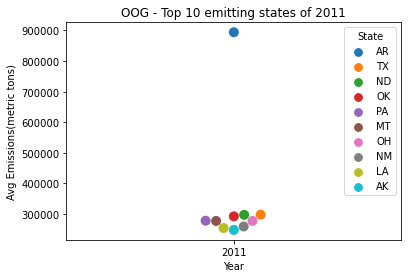

In [55]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= oog_top10)
plt.title('OOG - Top 10 emitting states of 2011')

Text(0.5, 1.0, 'OOG - Top 10 emitting states of 2020')

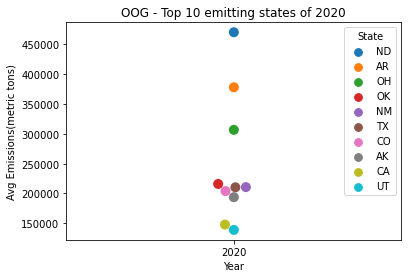

In [56]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= oog_top10_2)
plt.title('OOG - Top 10 emitting states of 2020')

<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### Top 10 emitting states w.r. to OOG emissions in 2011 was aroung 300K and 2020 trends to bring that down under 250K except for a few.
     
</div>

Text(0.5, 1.0, 'OOG - Least emitting states of 2011')

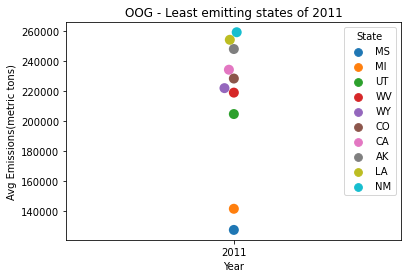

In [57]:
sns.swarmplot(x='Year', y='Avg Emissions(metric tons)', hue='State',size= 10, data= oog_bottom10)
plt.title('OOG - Least emitting states of 2011')

In [58]:
compare_oog = df_oog_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[top10_oog_11]
compare_oog = pd.melt(compare_oog,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

compare_oog_b = df_oog_gr[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']].loc[bot10_oog_11]
compare_oog_b = pd.melt(compare_oog_b,ignore_index=False,var_name='Year',value_name="Avg Emissions(metric tons)").reset_index()

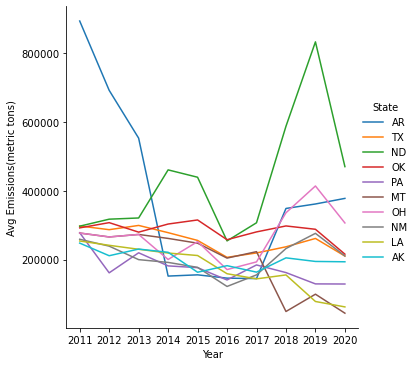

In [59]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_oog )


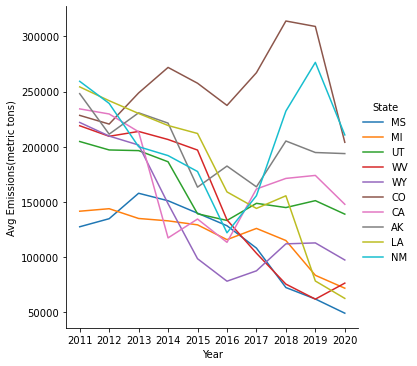

In [60]:
sns.relplot(x='Year', y='Avg Emissions(metric tons)', hue='State', markers = True, dashes = False, kind='line', data=compare_oog_b )


<div style="background-color:rgb(0, 255, 0, 0.0970588)"> 
    
### Unlike other emissions, LDC emissions have been brought down by both most and least emitting states of 2011.
    
</div>

In [61]:
change_oog = round((oog_20['Avg Emissions(metric tons)'] - oog_11['Avg Emissions(metric tons)'])/oog_11['Avg Emissions(metric tons)'],2)*100
print('\nStates that have reduced OOG emissions since 2011\n', change_oog[change_oog<0].sort_values())
print('\n\nStates that have increased OOG emissions since 2011\n', change_oog[change_oog>0].sort_values())


States that have reduced OOG emissions since 2011
 State
MT   -84.0
LA   -75.0
WV   -65.0
MS   -61.0
AR   -58.0
WY   -56.0
PA   -54.0
MI   -49.0
CA   -37.0
UT   -32.0
TX   -29.0
OK   -26.0
AK   -22.0
NM   -19.0
CO   -11.0
Name: Avg Emissions(metric tons), dtype: float64


States that have increased OOG emissions since 2011
 State
OH    11.0
ND    58.0
Name: Avg Emissions(metric tons), dtype: float64


# 7. Subsetting the datasets with the numeric columns and the State

The data has been sliced to have just the numerical columns with just the State column. We are analyzing the emissions from each State. 

In [62]:
columns = ['State','Latitude', 'Longitude','2020','2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011']
df_de_X = df_de[columns]
df_sf6_X = df_sf6[columns]
df_oog_X = df_oog[columns]
df_ldc_X = df_ldc[columns]
df_de_X.reset_index(drop=True,inplace=True)
df_sf6_X.reset_index(drop=True,inplace=True)
df_oog_X.reset_index(drop=True,inplace=True)
df_ldc_X.reset_index(drop=True,inplace=True)

# 8. One-hot encoded for States

One hot encoding is a process of converting the Categorical variables into Numerical variables so that the ML algorithms can do well with their perdiction.

In [63]:
df_de_st_dummies=pd.get_dummies(df_de_X['State'])
df_de_X_d= df_de_X.drop(['State','2020'],axis=1).join(df_de_st_dummies)
columns = df_de_X_d.columns
df_de_y=df_de_X[['2020']]
df_sf6_st_dummies=pd.get_dummies(df_sf6_X['State'])
df_sf6_X_d = df_sf6_X.drop(['State','2020'],axis=1).join(df_sf6_st_dummies)
df_sf6_y=df_sf6_X[['2020']]
df_oog_st_dummies=pd.get_dummies(df_oog_X['State'])
df_oog_X_d = df_oog_X.drop(['State','2020'],axis=1).join(df_oog_st_dummies)
df_oog_y=df_oog_X[['2020']]
df_ldc_st_dummies=pd.get_dummies(df_ldc_X['State'])
df_ldc_X_d= df_ldc_X.drop(['State','2020'],axis=1).join(df_ldc_st_dummies)
df_ldc_y=df_ldc_X[['2020']]


# 9. Model 1: MultiOutput Regressor

In [64]:
#Creating the model for DE dataset

#Dropping the 3 years data to enable prediction for 3 years
X = df_de_X.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df_de_X.State))
y= df_de_X[['2018','2019','2020']]

#Splitting data into training and test sets
df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)

#Defining the MultiOutputRegressor
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2))
start_multirf = time.time()
regr_multirf.fit(df_de_X_train, df_de_y_train)
stop_multirf = time.time()
multirf_fit_time = stop_multirf-start_multirf
#Predicting for 3 years
y_multirf = regr_multirf.predict(df_de_X_test)


In [65]:
print('Mean squared error', mean_squared_error(df_de_y_test, y_multirf))
print('SQRT of R-squared', math.sqrt(mean_squared_error(df_de_y_test, y_multirf)))
print('Mean absolute error', mean_absolute_error(df_de_y_test, y_multirf))


rmse=np.sqrt(np.sum((y_multirf - df_de_y_test)**2)/len(df_de_y_test))
mae = np.sum(np.abs(y_multirf - df_de_y_test))/len(df_de_y_test)
den =np.sum((df_de_y_test-np.mean(df_de_y_test))**2)/len(df_de_y_test)
print('R-squared error for DE dataset:\n',1-(rmse/den))

Mean squared error 169041718241.71487
SQRT of R-squared 411146.83294622967
Mean absolute error 112717.7466297919
R-squared error for DE dataset:
 2018    1.000000
2019    1.000000
2020    0.999999
dtype: float64


## 9.1 MultiOutput Regressor model for all 4 datasets - Random Forest

In [66]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=15, max_depth=3, random_state=2))
y_multirf=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    start_multirf = time.time()
    regr_multirf.fit(X_train, y_train)
    stop_multirf = time.time()

    y_multirf=regr_multirf.predict(X_test)
    multirf_fit_time = stop_multirf-start_multirf

    rmse=np.sqrt(np.sum((y_multirf - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multirf - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))
    print('Time taken to fit the dataset:',multirf_fit_time )

R-squared error for dataset:
 2018    1.000000
2019    1.000000
2020    0.999999
dtype: float64
Time taken to fit the dataset: 0.5279350280761719
R-squared error for dataset:
 2018    0.999990
2019    0.999990
2020    0.999989
dtype: float64
Time taken to fit the dataset: 0.04987287521362305
R-squared error for dataset:
 2018    0.999998
2019    0.999998
2020    0.999997
dtype: float64
Time taken to fit the dataset: 0.05684804916381836
R-squared error for dataset:
 2018    0.999990
2019    0.999988
2020    0.999987
dtype: float64
Time taken to fit the dataset: 0.04787421226501465


Without the default parameters, the regressor is yielding the best results. 

## 9.2 MultiOutput Regressor model for all 4 datasets - Ridge

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multiridge = make_pipeline(StandardScaler(with_mean=False), Ridge())
#regr_multiridge = MultiOutputRegressor(Ridge(normalize=True))
y_multirf=[]

for df in Xs:
    #X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    #y= df[['2018','2019','2020']]
    X = df.drop(['State','2016','2017','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2016','2017','2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    start_multird = time.time()
    regr_multiridge.fit(X_train, y_train)
    stop_multird = time.time()
    y_multiridge=regr_multiridge.predict(X_test)
    multird_fit_time = stop_multird-start_multird

    rmse=np.sqrt(np.sum((y_multiridge - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multiridge - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))
    print('Time taken to fit the dataset:',multird_fit_time )


R-squared error for dataset:
 2016    1.000000
2017    1.000000
2018    1.000000
2019    1.000000
2020    0.999999
dtype: float64
Time taken to fit the dataset: 0.011967658996582031
R-squared error for dataset:
 2016    0.999994
2017    0.999990
2018    0.999993
2019    0.999991
2020    0.999984
dtype: float64
Time taken to fit the dataset: 0.003992557525634766
R-squared error for dataset:
 2016    0.999996
2017    0.999998
2018    0.999998
2019    0.999998
2020    0.999996
dtype: float64
Time taken to fit the dataset: 0.003972291946411133
R-squared error for dataset:
 2016    0.999992
2017    0.999990
2018    0.999987
2019    0.999984
2020    0.999979
dtype: float64
Time taken to fit the dataset: 0.003989219665527344


TThe R<sup>2</sup> scores show that the Ridge regressor is yielding the best results for the datasets, as well.

# 10. Model 2: Ordinary Least Squares



## 10.1 Standardizing the numeric columns

In [68]:
scaler = preprocessing.StandardScaler().fit(df_de_X_d)
df_de_X_s=pd.DataFrame(scaler.transform(df_de_X_d))
df_de_X_s.columns = df_de_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_sf6_X_d)
df_sf6_X_s=pd.DataFrame(scaler.transform(df_sf6_X_d))
df_sf6_X_s.columns = df_sf6_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_oog_X_d)
df_oog_X_s=pd.DataFrame(scaler.transform(df_oog_X_d))
df_oog_X_s.columns = df_oog_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_ldc_X_d)
df_ldc_X_s=pd.DataFrame(scaler.transform(df_ldc_X_d))
df_ldc_X_s.columns = df_ldc_X_d.columns

## 10.2 Adding a constant and Train Test split of the datasets for a Linear Regression Model

In [69]:
df_de_X_s1 = sm.add_constant(df_de_X_s)
df_sf6_X_s1 = sm.add_constant(df_sf6_X_s)
df_oog_X_s1 = sm.add_constant(df_oog_X_s)
df_ldc_X_s1 = sm.add_constant(df_ldc_X_s)

df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(df_de_X_s1, df_de_y, test_size = 0.25, random_state = 246)
df_sf6_X_train, df_sf6_X_test, df_sf6_y_train, df_sf6_y_test=train_test_split(df_sf6_X_s1, df_sf6_y, test_size = 0.25, random_state = 246)
df_oog_X_train, df_oog_X_test, df_oog_y_train, df_oog_y_test=train_test_split(df_oog_X_s1, df_oog_y, test_size = 0.25, random_state = 246)
df_ldc_X_train, df_ldc_X_test, df_ldc_y_train, df_ldc_y_test=train_test_split(df_ldc_X_s1, df_ldc_y, test_size = 0.25, random_state = 246)


## 10.3 OLS Model on 4 datasets

In [70]:
rModel_de = sm.OLS(df_de_y_train, df_de_X_train)
ols_de_start = time.time()
rModel_de_results = rModel_de.fit()
ols_de_stop = time.time()
ols_de_fit_time = ols_de_stop-ols_de_start
print(rModel_de_results.summary())
print('Time taken to fit the model: ',ols_de_fit_time)

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1778.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:42:38   Log-Likelihood:                -70938.
No. Observations:                5180   AIC:                         1.420e+05
Df Residuals:                    5115   BIC:                         1.424e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.152e+05   3002.845    138.255      0.0

### The R-squared value of .957 determines that model is working well with this Direct Emission data. 

In [71]:
rModel_sf6 = sm.OLS(df_sf6_y_train, df_sf6_X_train)
ols_sf6_start = time.time()
rModel_sf6_results = rModel_sf6.fit()
ols_sf6_stop = time.time()
ols_sf6_fit_time = ols_sf6_stop-ols_sf6_start
print(rModel_sf6_results.summary())
print("Time taken to fit OLS for SF6 data: ", ols_sf6_fit_time)

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2.751
Date:                Thu, 25 Aug 2022   Prob (F-statistic):            0.00457
Time:                        18:42:38   Log-Likelihood:                -724.60
No. Observations:                  66   AIC:                             1531.
Df Residuals:                      25   BIC:                             1621.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.77e+04   4342.707      6.379      0.0

### R-squared value is .815 for the SF6 dataset, which shows the possibility for improvement to the model.

In [72]:
rModel_ldc = sm.OLS(df_ldc_y_train, df_ldc_X_train)
ols_ldc_start = time.time()
rModel_ldc_results = rModel_ldc.fit()
ols_ldc_stop = time.time()
ols_ldc_fit_time = ols_ldc_stop-ols_ldc_start
print(rModel_ldc_results.summary())
print("Time taken to fit OLS model to LDC data: ",ols_ldc_fit_time )

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     944.9
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.14e-83
Time:                        18:42:38   Log-Likelihood:                -1247.1
No. Observations:                 123   AIC:                             2600.
Df Residuals:                      70   BIC:                             2749.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.751e+04    809.544     95.750      0.0

### R-squared value is .999 for the LDC dataset, the model is doing the maximum best.

In [73]:
rModel_oog = sm.OLS(df_oog_y_train, df_oog_X_train)
ols_oog_start = time.time()
rModel_oog_results = rModel_oog.fit()
ols_oog_stop = time.time()
ols_oog_fit_time = ols_oog_stop - ols_oog_start
print(rModel_oog_results.summary())
print("Time taken to fit OLS model to OOG data: ", ols_oog_fit_time)

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     36.84
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           2.89e-82
Time:                        18:42:38   Log-Likelihood:                -4718.8
No. Observations:                 351   AIC:                             9494.
Df Residuals:                     323   BIC:                             9602.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.048e+05   9394.894     21.800      0.0

### R-squared value is .775 for the OOG dataset, the model has a lot of scope for improvement.

# 11. Model 3: Random Forest Regressor Model

RMSE for DE dataset:  366144.6065214333
MAE for DE dataset:  81337.52703916983
R-squared error for DE dataset:  0.999999596508657
Time taken to fit RF to DE data:  0.794905424118042


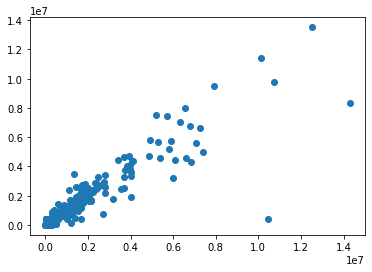

In [74]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
de_train = np.ravel(df_de_y_train)
rf_de_start = time.time()
rModel_de_res = reg.fit(df_de_X_train, de_train)
rf_de_stop = time.time()
rf_de_fit_time = rf_de_stop - rf_de_start
de_pred = rModel_de_res.predict(df_de_X_test)
de_test = np.ravel(df_de_y_test)
plt.scatter(de_pred,de_test)


rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))
print("Time taken to fit RF to DE data: ", rf_de_fit_time)

In [75]:
print(de_pred, de_test)

[ 10761.08346667 136920.08666667 213849.27783249 ... 413398.29880888
 355328.02405393  22599.61893333] [ 11645.25       174173.5        115621.682      ... 413398.29880888
 391888.048       22248.672     ]


RMSE for OOG dataset:  160146.14351429942
MAE for OOG dataset:  79334.97215641025
R-squared error for OOG dataset:  0.9999972838017341
Time taken to fit RF model to OOG data:  0.034873247146606445


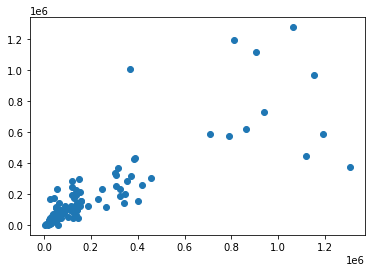

In [76]:
y_train = np.ravel(df_oog_y_train)
oog_rf_start = time.time()
model_oog_res = reg.fit(df_oog_X_train, y_train)
oog_rf_stop = time.time()
oog_rf_fit_time = oog_rf_stop - oog_rf_start
oog_pred = model_oog_res.predict(df_oog_X_test)
oog_test = np.ravel(df_oog_y_test)
plt.scatter(oog_pred, oog_test)

rmse=np.sqrt(np.sum((oog_pred - oog_test)**2)/len(oog_pred))
print('RMSE for OOG dataset: ',rmse)
mae = np.sum(np.abs(oog_pred - oog_test))/len(oog_pred)
print('MAE for OOG dataset: ',mae)
den =np.sum((oog_test-np.mean(oog_test))**2)/len(oog_test)
print('R-squared error for OOG dataset: ',1-(rmse/den))
print("Time taken to fit RF model to OOG data: ",oog_rf_fit_time )

RMSE for LDC dataset:  5025.030076321013
MAE for LDC dataset:  3086.2842569105683
R-squared error for LDC dataset 0.9999969348431952
Time taken to fit RF model to LDC data:  0.019946575164794922


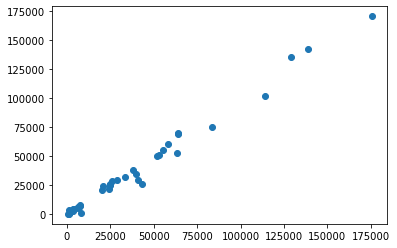

In [77]:
ldc_train = np.ravel(df_ldc_y_train)
rf_ldc_start = time.time()
rModel_ldc_res = reg.fit(df_ldc_X_train, ldc_train)
rf_ldc_stop = time.time()
rf_ldc_fit_time = rf_ldc_stop - rf_ldc_start
ldc_pred = rModel_ldc_res.predict(df_ldc_X_test)
ldc_test = np.ravel(df_ldc_y_test)
plt.scatter(ldc_pred,ldc_test)


rmse=np.sqrt(np.sum((ldc_pred - ldc_test)**2)/len(ldc_pred))
print('RMSE for LDC dataset: ',rmse)
mae = np.sum(np.abs(ldc_pred - ldc_test))/len(ldc_pred)
print('MAE for LDC dataset: ',mae)
den =np.sum((ldc_test-np.mean(ldc_test))**2)/len(ldc_test)
print('R-squared error for LDC dataset', 1-(rmse/den))
print("Time taken to fit RF model to LDC data: ",rf_ldc_fit_time)

RMSE for SF6 dataset:  37304.66170046136
MAE for SF6 dataset:  21185.232321070238
R-squared error for SF6 dataset: 0.9999878036751283
Time taken to fit Rf model to SF6 data:  0.016955852508544922


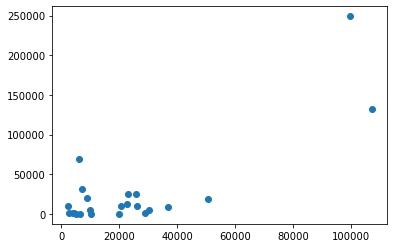

In [78]:
sf6_train = np.ravel(df_sf6_y_train)
rf_sf6_start = time.time()
rModel_sf6_res = reg.fit(df_sf6_X_train, sf6_train)
rf_sf6_stop = time.time()
rf_sf6_fit_time = rf_sf6_stop - rf_sf6_start
sf6_pred = rModel_sf6_res.predict(df_sf6_X_test)
sf6_test = np.ravel(df_sf6_y_test)
plt.scatter(sf6_pred,sf6_test)


rmse=np.sqrt(np.sum((sf6_pred - sf6_test)**2)/len(sf6_pred))
print('RMSE for SF6 dataset: ',rmse)
mae = np.sum(np.abs(sf6_pred - sf6_test))/len(sf6_pred)
print('MAE for SF6 dataset: ',mae)
den =np.sum((sf6_test-np.mean(sf6_test))**2)/len(sf6_test)
print('R-squared error for SF6 dataset:', 1-(rmse/den))
print("Time taken to fit Rf model to SF6 data: ",rf_sf6_fit_time)

### Random Forest Model is doing very well on all the four datasets.

# 12. Comparison of performance metric R<sup>2</sup> of different models

|Model Name|Hyperparamters|R<sup>2</sup> score|Fit Time|
|:-|:-|:-|:-|
|OLS Linear Regression||||
|DE||0.957|.015|
|SF6||0.815|.0009|
|OOG||0.775|.0009|
|LDC||0.999|.0009|
|Random Forest||||
|DE|n_estimators = 1|0.999|1.037|
|OOG|n_estimators = 1|0.999|0.052|
|LDC|n_estimators = 1|0.999|0.033|
|SF6|n_estimators = 1|0.999|0.027|
|Multi output Ridge Regressor||||
|DE||1.0|0.018|
|OOG||0.999|0.008|
|LDC||0.999|0.007|
|SF6||0.999|0.008|
|Multi output RF Regressor||||
|DE||1.0|0.52|
|OOG||0.999|0.05|
|LDC||0.999|0.07|
|SF6||0.999|0.06|


## Building a Random Forest Model to predict the future 10 years emission

RMSE for DE dataset:  108824.77299000543
MAE for DE dataset:  28483.477785201456
R-squared error for DE dataset:  0.9999998942162959


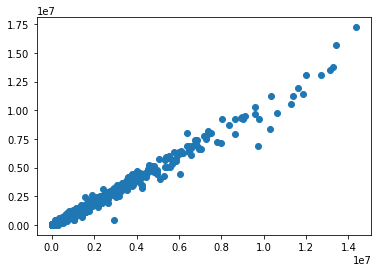

In [79]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)

de_train = np.ravel(df_de_y)
rModel_de_res = reg.fit(df_de_X_s, de_train)
de_pred = rModel_de_res.predict(df_de_X_s)
de_test = np.ravel(df_de_y)
plt.scatter(de_pred,de_test)

rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))

In [80]:
print(df_de_y)

              2020
0     5.040640e+05
1     4.133983e+05
2     4.133983e+05
3     6.081970e+04
4     4.133983e+05
...            ...
6902  1.507295e+04
6903  1.780787e+06
6904  3.256794e+05
6905  0.000000e+00
6906  8.947675e+04

[6907 rows x 1 columns]


In [81]:
years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
y_future = {}
i=9
X1=df_de_X_s.copy()
df_de_y_ite = de_train
for year in years_future:
    reg.fit(X1, df_de_y_ite)
    y_pred = rModel_de_res.predict(X1)
    #append the results to the dataframe
    X1 = X1.drop([years[-1]],axis = 1)
    X1[year] = y_pred
    df_de_y_ite = y_pred
    years.pop(i)
    i=i-1
rModel_de_res.fit(X1, df_de_y_ite)
X1['2030'] =rModel_de_res.predict(X1)

In [82]:
X1.head()

,Latitude,Longitude,AK,AL,AR,AZ,CA,CO,CT,DC,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,-0.732773,-0.236393,-0.098971,-0.157891,-0.147464,-0.114253,-0.274507,-0.148994,-0.084528,-0.031851,...,507193.745431,506201.660146,506721.208254,505489.382209,506384.735450,506472.594370,505713.832856,504261.525233,504245.561584,503349.636223
1,-0.062069,0.616273,-0.098971,-0.157891,-0.147464,-0.114253,-0.274507,-0.148994,-0.084528,-0.031851,...,413398.298809,413398.298809,413398.298809,413398.298809,413398.298809,413398.298884,413398.300654,413398.300654,413398.301364,413398.301813
2,-0.059072,0.614666,-0.098971,-0.157891,-0.147464,-0.114253,-0.274507,-0.148994,-0.084528,-0.031851,...,388649.652275,388661.509518,388664.899493,388668.257843,388673.257607,388676.435823,388678.515561,388679.110114,388677.689495,388678.353973
3,0.527096,1.199768,-0.098971,-0.157891,-0.147464,-0.114253,-0.274507,-0.148994,-0.084528,-0.031851,...,56675.163547,56676.055110,56677.760545,56679.418041,56680.989460,56683.082103,56684.745894,56688.001901,56689.265404,56690.143859
4,-0.143141,-0.931640,-0.098971,-0.157891,-0.147464,-0.114253,-0.274507,-0.148994,-0.084528,-0.031851,...,413398.298809,413398.298809,413398.298809,413398.298809,413398.298809,413398.298884,413398.300654,413398.300654,413398.301364,413398.301813


## Following the same steps for all the four data sets

In [83]:
Xs=[df_de_X_s,df_sf6_X_s,df_oog_X_s,df_ldc_X_s]
ys=[df_de_y,df_sf6_y,df_oog_y,df_ldc_y]
output=[]
for df in range(4):
    y = np.ravel(ys[df])
    X=Xs[df]
    years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
    years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
    i=9
    X1=X.copy()
    for year in years_future:
        rModel_res = reg.fit(X1, y)
        y_pred = rModel_res.predict(X1)
        #append the results to the dataframe
        X1 = X1.drop([years[-1]],axis = 1)
        X1[year] = y_pred
        y = y_pred
        years.pop(i)
        i=i-1
    rModel_res = reg.fit(X1, y)
    X1['2030'] =rModel_res.predict(X1)
    output.append(X1)

In [84]:
de_future = output[0]
sf6_future = output[1]
oog_future = output[2]
ldc_future = output[3]


# 13. Output - Future prediction

In [85]:
print(de_future, sf6_future, oog_future, ldc_future)

      Latitude  Longitude        AK        AL        AR        AZ        CA  \
0    -0.732773  -0.236393 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
1    -0.062069   0.616273 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
2    -0.059072   0.614666 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
3     0.527096   1.199768 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
4    -0.143141  -0.931640 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
...        ...        ...       ...       ...       ...       ...       ...   
6902 -0.338201  -0.466608 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
6903  0.896104   0.435111 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
6904  0.837528   0.314270 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
6905  0.368663  -0.776871 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   
6906 -0.328459   0.626467 -0.098971 -0.157891 -0.147464 -0.114253 -0.274507   

            CO        CT        DC  ...          20

In [86]:
df_de_pred = pd.DataFrame()
df_sf6_pred = pd.DataFrame()
df_ldc_pred = pd.DataFrame()
df_oog_pred = pd.DataFrame()

In [87]:
df_de_X.columns

Index(['State', 'Latitude', 'Longitude', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011'],
      dtype='object')

In [88]:
df_de_pred['State'] = df_de_X['State']
df_de_pred['2011'] = df_de_X['2011']
df_de_pred['2020']=df_de_X['2020']
df_de_pred['2030']=de_future['2030']
df_de_pred['reduction'] = 100*(df_de_pred['2020'] - df_de_pred['2030'])/df_de_pred['2030'] 

df_oog_pred['State'] = df_oog_X['State']
df_oog_pred['2011'] = df_oog_X['2011']
df_oog_pred['2020']=df_oog_X['2020']
df_oog_pred['2030']=oog_future['2030']
df_oog_pred['reduction'] = 100*(df_oog_pred['2020'] - df_oog_pred['2030'])/df_oog_pred['2030'] 

df_sf6_pred['State'] = df_sf6_X['State']
df_sf6_pred['2011'] = df_sf6_X['2011']
df_sf6_pred['2020']=df_sf6_X['2020']
df_sf6_pred['2030']=sf6_future['2030']
df_sf6_pred['reduction'] = 100*(df_sf6_pred['2020'] - df_sf6_pred['2030'])/df_sf6_pred['2030'] 

df_ldc_pred['State'] = df_ldc_X['State']
df_ldc_pred['2011'] = df_ldc_X['2011']
df_ldc_pred['2020']=df_ldc_X['2020']
df_ldc_pred['2030']=ldc_future['2030']
df_ldc_pred['reduction'] = 100*(df_ldc_pred['2020'] - df_ldc_pred['2030'])/df_ldc_pred['2030'] 


In [89]:
df_de_pred.columns

Index(['State', '2011', '2020', '2030', 'reduction'], dtype='object')

In [90]:
df_de_g = df_de_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_oog_g = df_oog_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_sf6_g = df_sf6_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_ldc_g = df_ldc_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))

In [91]:
df_de_g['2020-30 %']=round(100*(df_de_g['2020'] - df_de_g['2030'])/df_de_g['2020'],2)
df_de_g['2011-20 %']=round(100*(df_de_g['2011'] - df_de_g['2020'])/df_de_g['2011'],2)
df_de_g['emission'] = 1
df_de_g.loc[df_de_g['2020-30 %']<0,'emission'] = -1

df_oog_g['2020-30 %']=round(100*(df_oog_g['2020'] - df_oog_g['2030'])/df_oog_g['2020'],2)
df_oog_g['2011-20 %']=round(100*(df_oog_g['2011'] - df_oog_g['2020'])/df_oog_g['2011'],2)
df_oog_g['emission'] = 1
df_oog_g.loc[df_oog_g['2020-30 %']<0,'emission'] = -1

df_sf6_g['2020-30 %']=round(100*(df_sf6_g['2020'] - df_sf6_g['2030'])/df_sf6_g['2020'],2)
df_sf6_g['2011-20 %']=round(100*(df_sf6_g['2011'] - df_sf6_g['2020'])/df_sf6_g['2011'],2)
df_sf6_g['emission'] = 1
df_sf6_g.loc[df_sf6_g['2020-30 %']<0,'emission'] = -1

df_ldc_g['2020-30 %']=round(100*(df_ldc_g['2020'] - df_ldc_g['2030'])/df_ldc_g['2020'],2)
df_ldc_g['2011-20 %']=round(100*(df_ldc_g['2011'] - df_ldc_g['2020'])/df_ldc_g['2011'],2)
df_ldc_g['emission'] = 1
df_ldc_g.loc[df_ldc_g['2020-30 %']<0,'emission'] = -1

In [92]:
cnt_g_de = df_de_g.groupby('emission')[['emission']].count()
cnt_g_oog = df_oog_g.groupby('emission')[['emission']].count()
cnt_g_sf6 = df_sf6_g.groupby('emission')[['emission']].count()
cnt_g_ldc = df_ldc_g.groupby('emission')[['emission']].count()

print(cnt_g_de, cnt_g_oog, cnt_g_sf6, cnt_g_ldc)

df_de_g.index

          emission
emission          
-1              26
 1              28           emission
emission          
-1               7
 1              10           emission
emission          
-1              25
 1              11           emission
emission          
-1              21
 1              22


Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='State')

## States that are predicted to reduce emissions by 2030

In [93]:
de_red_emi = df_de_g.loc[df_de_g['emission'] == 1]
print("States that would have reduced direct emissions as per the above predictive model: ")
print(de_red_emi[['2011','2020','2011-20 %','2030','2020-30 %']].sort_values(by='2011', ascending=False))

oog_red_emi = df_oog_g.loc[df_oog_g['emission'] == 1]
print("States that would have reduced emissions by OOG as per the above predictive model: ")
print(oog_red_emi[['2011','2020','2011-20 %','2030','2020-30 %']].sort_values(by='2011', ascending=False))

sf6_red_emi = df_sf6_g.loc[df_sf6_g['emission'] == 1]
print("States that would have reduced SF6 emissions as per the above predictive model: ")
print(sf6_red_emi[['2011', '2020','2011-20 %','2030','2020-30 %']].sort_values(by='2011', ascending=False))

ldc_red_emi = df_ldc_g.loc[df_ldc_g['emission'] == 1]
print("States that would have reduced emissions by LDC as per the above predictive model: ")
print(ldc_red_emi[['2011','2020','2011-20 %','2030','2020-30 %']].sort_values(by='2011', ascending=False))

States that would have reduced direct emissions as per the above predictive model: 
             2011       2020  2011-20 %       2030  2020-30 %
State                                                        
VI     1373102.81  268431.88      80.45  243288.56       9.37
ND      844030.38  820802.66       2.75  795841.98       3.04
MO      834667.83  670748.27      19.64  646079.32       3.68
FL      769072.93  701441.68       8.79  681291.05       2.87
AZ      671738.22  530331.26      21.05  526634.34       0.70
AL      661730.26  476501.12      27.99  452171.80       5.11
PR      626840.88  595794.72       4.95  577679.48       3.04
OH      574821.24  442833.76      22.96  431610.36       2.53
UT      563220.18  526601.26       6.50  514973.74       2.21
TX      550274.19  538257.61       2.18  534233.43       0.75
WY      546886.84  647975.93     -18.48  642937.32       0.78
IL      498644.52  354906.10      28.83  354296.16       0.17
SC      486913.89  380110.29      21.93  380029.

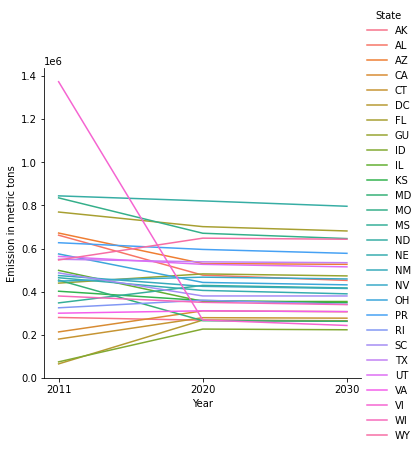

In [94]:
de = pd.melt(de_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=de )

             2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                                  
VI     1373102.81  268431.88  243288.56       9.37      80.45         1
KY      775796.10  517822.53  529619.94      -2.28      33.25        -1
AL      661730.26  476501.12  452171.80       5.11      27.99         1
IN      841352.87  609700.12  609762.16      -0.01      27.53        -1
AZ      671738.22  530331.26  526634.34       0.70      21.05         1
MO      834667.83  670748.27  646079.32       3.68      19.64         1
WV      820435.24  694078.72  707939.13      -2.00      15.40        -1
FL      769072.93  701441.68  681291.05       2.87       8.79         1
PR      626840.88  595794.72  577679.48       3.04       4.95         1
ND      844030.38  820802.66  795841.98       3.04       2.75         1
            2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                            

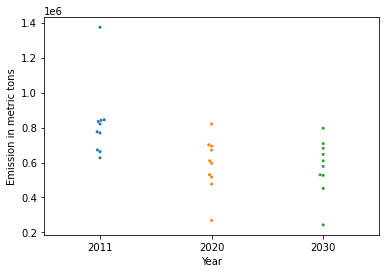

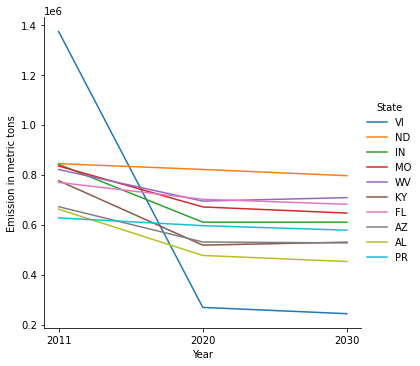

In [95]:
top10_de = df_de_g.loc[top10_st_11]
bot10_de = df_de_g.loc[bot10_st_11]
de10 = pd.melt(top10_de[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= de10)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=de10 )
print(top10_de.sort_values(by='2011-20 %', ascending=False))
print(bot10_de.sort_values(by='2011-20 %', ascending=False))

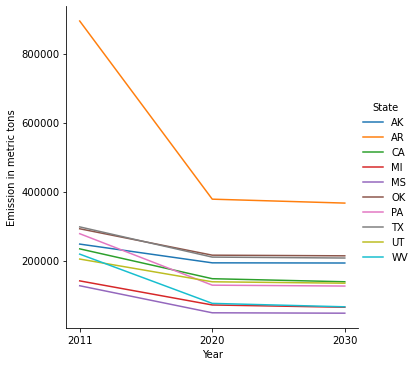

In [96]:
oog = pd.melt(oog_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=oog )

            2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                                 
MT     277409.11   44226.69   49679.39     -12.33      84.06        -1
LA     254266.22   62512.22   63742.37      -1.97      75.41        -1
AR     894210.02  378190.31  366835.27       3.00      57.71         1
PA     278211.23  129120.73  126544.96       1.99      53.59         1
TX     297923.84  210382.77  207723.43       1.26      29.38         1
OK     292430.26  215994.58  214101.09       0.88      26.14         1
AK     248107.55  193788.34  193291.30       0.26      21.89         1
NM     259301.89  210710.64  212830.35      -1.01      18.74        -1
OH     277409.11  306758.07  319976.36      -4.31     -10.58        -1
ND     297316.79  470553.06  585482.01     -24.42     -58.27        -1
            2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                                 
LA    

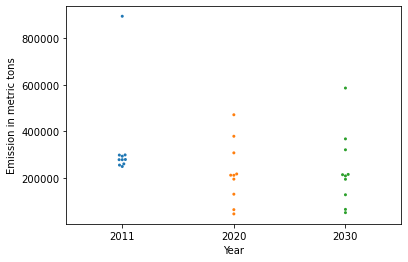

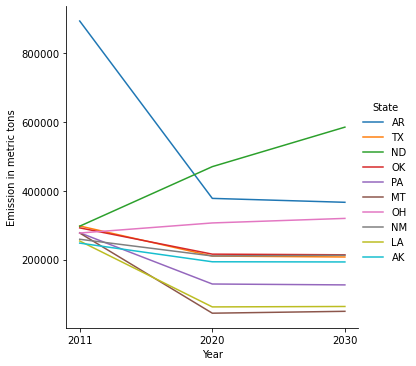

In [97]:
top10_oog = df_oog_g.loc[top10_oog_11]
bot10_oog = df_oog_g.loc[bot10_oog_11]

oog10 = pd.melt(top10_oog[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= oog10)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=oog10 )
print(top10_oog.sort_values(by='2011-20 %', ascending=False))
print(bot10_oog.sort_values(by='2011-20 %', ascending=False))

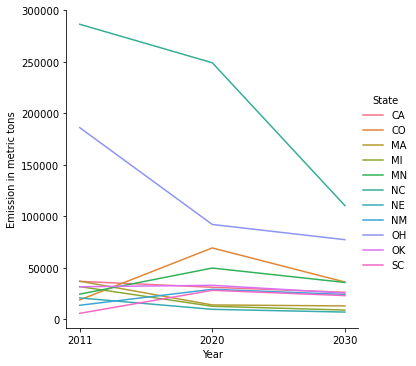

In [98]:
sf6 = pd.melt(sf6_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=sf6 )

Index(['NC', 'TN', 'OH', 'UT', 'VA', 'GA', 'KS', 'NY', 'PA', 'IN'], dtype='object', name='State')
            2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                                 
IN      46781.94    2616.68    5059.63     -93.36      94.41        -1
UT     168672.12   25203.12   36631.06     -45.34      85.06        -1
KS      62515.32    9993.24   12934.44     -29.43      84.01        -1
TN     205327.68   35547.48   84838.91    -138.66      82.69        -1
VA     116872.80   30973.80   41595.30     -34.29      73.50        -1
NY      52750.15   16802.08   19808.91     -17.90      68.15        -1
PA      49367.80   19250.90   19798.52      -2.84      61.01        -1
OH     186095.12   92007.88   77240.16      16.05      50.56         1
NC     286543.56  249121.92  110320.03      55.72      13.06         1
GA      73897.08   67909.80   83151.62     -22.44       8.10        -1
           2011      2020      2030  2020-30 %  20

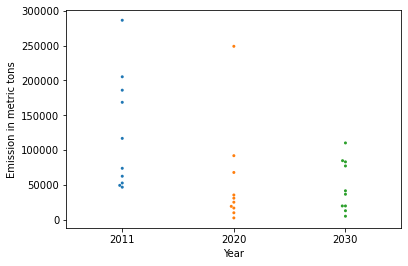

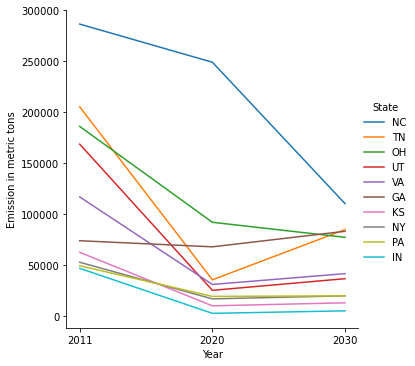

In [99]:
top10_sf6 = df_sf6_g.loc[top10_sf6_11]
bot10_sf6 = df_sf6_g.loc[bot10_sf6_11]
print(top10_sf6.index)
sf610 = pd.melt(top10_sf6[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= sf610)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=sf610 )
print(top10_sf6.sort_values(by='2011-20 %', ascending=False))
print(bot10_sf6.sort_values(by='2011-20 %', ascending=False))

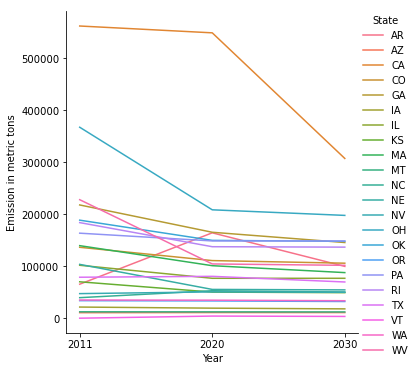

In [100]:
ldc = pd.melt(ldc_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=ldc )

            2011       2020       2030  2020-30 %  2011-20 %  emission
State                                                                 
WV     227769.10  104260.42  101620.80       2.53      54.23         1
OH     367033.67  208308.80  197585.61       5.15      43.25         1
NJ     280975.98  177008.61  178122.09      -0.63      37.00        -1
NY     211198.61  134802.81  137162.13      -1.75      36.17        -1
MA     139428.91  100909.54   87619.09      13.17      27.63         1
RI     183717.65  137393.40  136570.70       0.60      25.21         1
GA     217658.90  165161.15  145443.03      11.94      24.12         1
OK     188410.30  149571.85  147715.47       1.24      20.61         1
PA     163401.57  148489.66  148404.41       0.06       9.13         1
CA     561602.05  548482.12  307037.12      44.02       2.34         1
           2011      2020      2030  2020-30 %  2011-20 %  emission
State                                                              
LA     35101

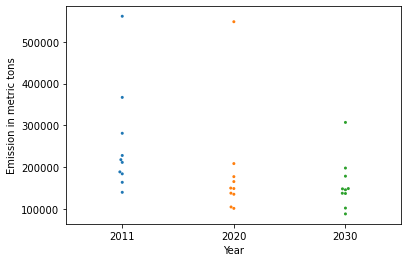

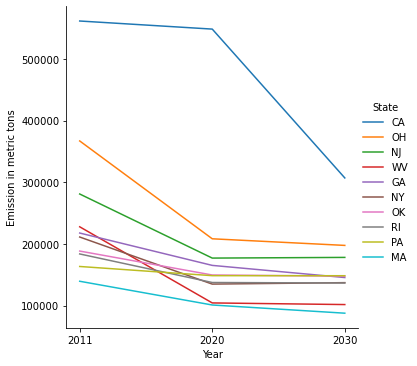

In [101]:
top10_ldc = df_ldc_g.loc[top10_ldc_11]
bot10_ldc = df_ldc_g.loc[bot10_ldc_11]
ldc10 = pd.melt(top10_ldc[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= ldc10)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=ldc10 )
print(top10_ldc.sort_values(by='2011-20 %', ascending=False))
print(bot10_ldc.sort_values(by='2011-20 %', ascending=False))

# 14. Conclusion
We chose regression models over time series models, since the latter need more time-related data and so didn't yield better results compared to regression techniques. Among the three regression techniques, OLS Regression, Random Forest Regression and Ridge Regression, Random Forest regression model showed the best performance score.

So, for all the 4 different emissions data from Direct Emitters, SF6, Local Dist. Companies (LDC) and Onshore Oil and Gas (OOG) companies, the data has been trained with RF modelling techniques and predicted the next 10 year's emission until 2030. The above charts shows the emission by the States that was predicted by the model to have reduced the emission by 2030.


Recommendations: Most states are doing well in reducing emissions though there are states which are expected to take more steps towards reducing emissions. The trends of future predictions also look encouraging. Though, in order to achieve EPA's goal of bringing down emissions by 85% is a long way.. Using advanced strategies and equipment in these facilities can help improve the emissions reduction rates.


Further work: The data can still be explored with respect to facilities in each city for the emissions and can be compared with other facilities. This can be taken as the future assignment.

